# 配置环境

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
print(os.path.abspath(os.path.join(os.getcwd(), "..")))

e:\2022Autumn\ai\handson-ml2


In [3]:
os.path.join(os.getcwd(),"..")

'e:\\2022Autumn\\ai\\handson-ml2\\homework\\..'

In [4]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "homework2"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 准备数据

## 下载数据

In [5]:
from sklearn.datasets import fetch_openml

def load_data(download):

    if download:
        # 下载数据
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        mnist.keys()
        print(type(mnist))
        X, y = mnist["data"], mnist["target"]
        # 保存数据到本地
        np.save("datasets/mnist/X.npy", X)
        np.save("datasets/mnist/y.npy", y)
    else:
        X= np.load("datasets/mnist/X.npy")
        y= np.load("datasets/mnist/y.npy")

    print(X.shape, y.shape)
    return X,y

X, y = load_data(download=False)

(70000, 784) (70000,)


Saving figure some_digit_plot


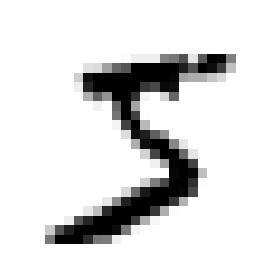

In [6]:
# 查看数据

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [7]:
y[0]

5

In [8]:
type(y), type(y[0])

(numpy.ndarray, numpy.uint8)

In [9]:
y = y.astype(np.uint8)

## 数据分析

In [10]:
from collections import Counter

counter = Counter(y)

In [11]:
# 可以看出样本分布比较均匀，直接纯随机采样即可

counter

Counter({5: 6313,
         0: 6903,
         4: 6824,
         1: 7877,
         9: 6958,
         2: 6990,
         3: 7141,
         6: 6876,
         7: 7293,
         8: 6825})

## 分割数据集

In [12]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X, y, test_size=0.2,random_state=42)

In [13]:
train_X.shape, train_y.shape

((56000, 784), (56000,))

In [14]:
test_X.shape, test_y.shape

((14000, 784), (14000,))

# 训练多分类器

使用KNN算法

algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=4, p=2, weights='distance'

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                                metric_params=None, n_jobs=None, n_neighbors=4, p=2, weights='distance')
knn_clf.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [16]:
y_train_pred = knn_clf.predict(train_X)

In [17]:
from sklearn.metrics import confusion_matrix

C1 = confusion_matrix(y_true=train_y, y_pred=y_train_pred)

In [18]:
print(C1.shape)
print(C1)

(10, 10)
[[5560    0    0    0    0    0    0    0    0    0]
 [   0 6277    0    0    0    0    0    0    0    0]
 [   0    0 5610    0    0    0    0    0    0    0]
 [   0    0    0 5708    0    0    0    0    0    0]
 [   0    0    0    0 5529    0    0    0    0    0]
 [   0    0    0    0    0 5040    0    0    0    0]
 [   0    0    0    0    0    0 5480    0    0    0]
 [   0    0    0    0    0    0    0 5790    0    0]
 [   0    0    0    0    0    0    0    0 5468    0]
 [   0    0    0    0    0    0    0    0    0 5538]]


In [19]:
y_test_pred = knn_clf.predict(test_X)
C2 = confusion_matrix(y_true=test_y, y_pred=y_test_pred)
print(C2.shape)
print(C2)

(10, 10)
[[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    0    0    4    0    1]
 [   7   14 1327    1    2    1    6   16    3    3]
 [   0    2   11 1384    1   11    1    9    6    8]
 [   2    6    1    0 1254    0    2    3    1   26]
 [   0    5    0   12    2 1240   10    0    2    2]
 [   4    0    0    0    4    4 1383    0    1    0]
 [   1   16    3    1    3    0    0 1467    1   11]
 [   2   12    3   19    1   17    5    8 1276   14]
 [   4    4    2    9   19    0    0   16    1 1365]]


In [22]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


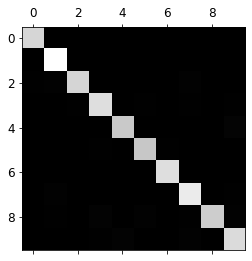

In [23]:
plt.matshow(C2, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [26]:
row_sums = C2.sum(axis=1, keepdims=True)
norm_C2 = C2 / row_sums

Saving figure confusion_matrix_errors_plot


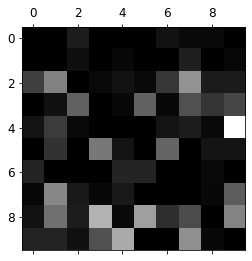

In [27]:
np.fill_diagonal(norm_C2, 0)
plt.matshow(norm_C2, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_true=test_y, y_pred=y_test_pred)
acc_score

0.9731428571428572

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X, train_y)

KNeighborsClassifier()

In [59]:
knn_clf.score(train_X, train_y)

0.9808392857142857